# Προγραμματιστική Εργασία στην Αριθμητική Ανάλυση

**Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης</br>
Τμήμα Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών</br>
Μάθημα: Αριθμητική Ανάλυση**

### <u>Παραγοντοποιήσεις LU και QR</u>

Η πρώτη συνάρτηση $LU_{mine}$ που μας δίνεται, δέχεται ως είσοδο τον τετραγωνικό πίνακα Α και μας δίνει ως έξοδο έναν κάτω τριγωνικό πίνακα L και έναν άνω τριγωνικό πίνακα U, έτσι ώστε:
$$
A=L\cdot{U}
$$
Ο κώδικας αυτής της συνάρτησης είναι ο εξής:

In [1]:
import numpy as np
def LUmine(A):
    n = A.shape[0]   #Η διάσταση του πίνακα
    L = np.matrix(np.identity(n))  #Δημιουργία μοναδιαίου μέρους του L
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = A[i,j] / A[j,j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j, j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i,j] = mult
            U[i,j] = 0         
    return L, U

Η δεύτερη συνάρτηση $QR_{mine}$ που μας δίνεται, δέχεται ως είσοδο τον **τετραγωνικό** πίνακα Α και μας δίνει στην έξοδο του τον πίνακα Q, ο οποίος είναι ορθογώνιος και τον πίνακα R, ο οποίος είναι άνω τριγωνικός. Σε αυτήν την περίπτωση πάλι ισχύει ότι:
$$ A=Q\cdot{R}$$

Θα δοκιμάσω στον παραπάνω κώδικα να βρώ τους πίνακες Q και R του παραδείγματος 8.3 του βιβλίου, όπου μου δίνεται ο τετραγωνικός πίνακας Α, τον οποίο ορίζω. Φυσικά, καλώ την συνάρτηση $QR_{mine}$ και εμφανίζω τους πίνακες Q και R. Επιπλέον, για ένα δεύτερο παράδειγμα βάζω έναν πίνακα που βρήκα στο <a href="https://www.math.ucla.edu/~yanovsky/Teaching/Math151B/handouts/GramSchmidt.pdf">διαδίκτυο</a>, για το οποίο γνωρίζω τους πίνακες Q και R, τους οποίους περιμένω ότι θα μου δώσει το πρόγραμμα.

Η διαφορά μεταξύ του πίνακα Α και του γινομένου πινάκων QR, θα την ονομάσω *σφάλμα (error)*. Θέλω το σφάλμα ιδανικά να είναι αρκετά μικρό, μικρότερο από μονάδα. Το σφάλμα μπορεί να διαφέρει κάθε φορά, σε εμένα το σφάλμα ήταν $9.057\cdot10^{-15}$. Το σφάλμα το υπολογίζω με χρήση της συνάρτησης: ```np.linalg.norm(A-Q*R)```.

In [2]:
import numpy as np
def QRmine(A):
    n = A.shape[0]
    Q = np.matrix(np.zeros( (n,n) ))
    
    for j in range(0, n):
        q = A[:,j]
        for i in range(0, n):
            length_of_leg = np.sum(A[:,j].T * Q[:,i])
            q = q - length_of_leg * Q[:,i]
        Q[:,j] = q/np.linalg.norm(q)
    R = np.matrix(Q[:,:].T * A[:,:], dtype=float)
    return Q, R
#Ex. 1 -- Παράδειγμα 8.3 - βιβλίο
A = np.matrix([[10, 9, 18], [20, -15, -15], [20, -12, 51]]) 
Q, R = QRmine(A)
print("Q:", Q)
print("R:", R)

#Βρίσκω και το σφάλμα στο παραπάνω παράδειγμα ως εξής:
error = np.linalg.norm(A - Q*R)
print("The error is:", error)

#Ex.2 -- Παράδειγμα από διαδίκτυο
B = np.matrix([[1, 1, 0], [1, 0, 1], [0, 1, 1]]) 
Q, R = QRmine(B)
print("\n\nQ:", Q)
print("R:", R)
#Το σφάλμα θα είναι:
print("The error is:", error)

Q: [[ 0.33333333  0.93333333 -0.13333333]
 [ 0.66666667 -0.33333333 -0.66666667]
 [ 0.66666667 -0.13333333  0.73333333]]
R: [[ 3.00000000e+01 -1.50000000e+01  3.00000000e+01]
 [ 1.22124533e-15  1.50000000e+01  1.50000000e+01]
 [-4.44089210e-16  1.33226763e-15  4.50000000e+01]]
The error is: 9.057678187205881e-15


Q: [[ 0.70710678  0.40824829 -0.57735027]
 [ 0.70710678 -0.40824829  0.57735027]
 [ 0.          0.81649658  0.57735027]]
R: [[ 1.41421356e+00  7.07106781e-01  7.07106781e-01]
 [ 1.66533454e-16  1.22474487e+00  4.08248290e-01]
 [ 2.22044605e-16 -1.11022302e-16  1.15470054e+00]]
The error is: 9.057678187205881e-15


Παρατηρώ ότι ο πίνακας R δεν μοιάζει να είναι άνω τριγωνικός εκ πρώτης όψεως. Ωστόσο, αν κοιτάξω καλύτερα παρατηρώ ότι τα στοιχεία κάτω από την κύρια διαγώνιο είναι της τάξης των $10^{-16}$ δηλαδή σχεδόν μηδέν. Θεωρώ λοιπόν ότι είναι σφάλματα απειροελάχιστα σφάλματα λόγω των υπολογισμών, και μπορώ να τα θεωρήσω ίσα με μηδέν. Έτσι, προκύπτει ο σωστός πίνακας R, τον οποίο θα έβρισκα και υπολογιστικά στο χαρτί.

---

### <u>Πίνακες Hilbert</u>

Ο πίνακας Hilbert, όπως είδαμε στην εκφώνηση είναι της μορφής:
$$
H_{ij}=1/(i+j+1)
$$

**α.** Δημιουργώ έναν πίνακα Hilbert διαστάσεων $n\times{n}$ και θα δοκιμάσουμε να εκτυπώσουμε τα αποτελέσματα για $n=4$ και $n=5$ για να δούμε αν λειτουργεί σωστά. Παρατηρούμε ότι λειτουργεί ορθά ο κώδικάς μου.

In [3]:
def makeHillbert(n):
    H = np.matrix(np.zeros((n,n)))
    for i in range(0, n):
        for j in range(0, n):
            H[i,j] = 1/(i+j+1)  
    return H

print("Hilbert matrix for n=4:")
print(makeHillbert(4))
print("\n\nHilbert matrix for n=5:")
print(makeHillbert(5))

Hilbert matrix for n=4:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


Hilbert matrix for n=5:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


**β.** Χρησιμοποιώ τις συναρτήσεις ```LUmine()``` που μου δόθηκε στην εκφώνηση και την συνάρτηση ```makeHillbert()``` που δημιούργησα στο προηγούμενο ερώτημα. Ο πίνακας **Α** παραγοντοποιείται ως εξής:
$$A=L\cdot{U}$$

Γνωρίζω ότι:
$$Ax=b$$

Θα λύσω τα γραμμικά συστήματα:
$$L\vec{y}=b$$
και
$$U\vec{x}=\vec{y}$$
Με αυτόν τον τρόπο, θα βρω τον μονοδιάστατο διάνυσμα $\vec{x}$ ο οποίος είναι η λύση του συστήματος.
Υλοποιώ λοιπόν την συνάρτηση ```Solveforb()``` στην οποία δίνω ως είσοδο απλά την διάσταση $n$ του πίνακα Hillbert $n\times{n}$ και παίρνω ως έξοδο το διάνυσμα $\vec{x}$.

In [4]:
import numpy as np
def LUmine(A):
    n = A.shape[0]   #Η διάσταση του πίνακα
    L = np.matrix(np.identity(n))  #Δημιουργία μοναδιαίου μέρους του L
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = A[i,j] / A[j,j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j, j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i,j] = mult
            U[i,j] = 0         
    return L, U

def makeHillbert(n):
    H = np.matrix(np.zeros((n,n)))
    for i in range(0, n):
        for j in range(0, n):
            H[i,j] = 1/(i+j+1)  
    return H

def Solveforb(n):
    b = np.ones((n,1))
    y = np.matrix(n)
    x = np.matrix(n)
    H = makeHillbert(n)
    L, U = LUmine(H)
    y= b.T*L.I;
    x= y*U.I;
    return x

#Example for n=4
n=4
print("Example for n=4:\n x:", Solveforb(n))

Example for n=4:
 x: [[ 6.16666667e-01  3.50000000e+00 -1.79500000e+02  5.82166667e+03]]


**γ.** Μεταβάλλουμε την τιμή του πρώτου στοιχείου του διανύσματος $\vec{b}$ κατά μια απειροελάχιστη τιμή, γνωστή ως ε. 

<u>Η συνάρτηση Absdiff()</u></br>
Δημιουργώ μια νέα συνάρτηση την `Absdiff()` (από το Absolute Difference), η οποία καλεί τις συναρτήσεις `makeHilbert` και `LUmine()`, που χρησιμοποιήσαμε στα προηγούμενα ερωτήματα. Ως ορίσματα αυτή η συνάρτηση δέχεται την μια διάσταση του πίνακα Hillbert (n) και την απειροελάχιστη τιμή ε. Υπολογίζει μέσα της το διάνυσμα $\vec{x}$ και το διάνυσμα $\vec{x_{new}}$ και βρίσκει την διαφορά τους (diff) σύμφωνα με την γραμμή κώδικα της εκφώνησης.</br></br>
Στο πρόγραμμα, καλούμε την συνάρτηση αυτή για n=4 (4x4 διαστάσεων πίνακα Hillbert) και ε=$10^{-15}$. Το αποτέλεσμα που θα μας επιστρέψει η συνάρτηση, μας δίνει τη Μέγιστη Απόλυτη Διαφορά (Maximum Absolute Difference) των δύο λύσεων. Παρατηρούμε ότι η τιμή αυτή θα είναι αρκετά μικρή, της τάξης των $10^{-12}$, το οποίο σημαίνει ότι οι δύο λύσεις διαφέρουν κατά πάρα πολύ λίγο. Το αποτέλεσμα αυτό το αναμέναμε, μιας και η μέθοδος παραγοντοποίησης LU (ως επαναληπτική μέθοδος) συγκλίνει γρήγορα στην πραγματική λύση του συστήματος των γραμμικών εξισώσεων. Γενικά, γνωρίζουμε ότι η ακολουθία $\{{x^{k}}\}$ συγκλίνει στην πραγματική λύση του συστήματος.

**δ.** </br>
<u>Η συνάρτηση plot()</u></br>
Δημιουργώ την συνάρτηση `plot()`, η οποία κατασκευάζει το διάγραμμα της συνάρτησης των τιμών διάφορων διαστάσεων ($n\geq1$) του πίνακα Hillbert με την Μέγιστη Απόλυτη Διαφορά για σταθερό ε. Η συνάρτηση αυτή καλεί μέσα της 6 φορές την συνάρτηση `Absdiff(n,e)`, αποθηκεύει τις τιμές των n και της διαφοράς (diff) σε δύο διανύσματα έξι θέσεων και τα σχεδιάζει, σε διακριτές τιμές, στο Διάγραμμα Απόλυτης Διαφοράς - Διάστασης πίνακα (n).</br></br>
Από το διάγραμμα παρατηρούμε ότι για $n=1$ εώς $n=4$ η απόλυτη διαφορά αυξάνεται αρκετά. Ωστόσο, από την διάσταση του πίνακα $n=4$ και μετά, η απόλυτη διαφορά σταθεροποιείται σε μια καθορισμένη τιμή. Αυτό συμβαίνει, καθώς αυξάνοντας τις τιμές των διαστάσεων, αυξάνονται η τιμές του διανύσματος x. Με αποτέλεσμα η μικρή διαφορά ε, να πάψει να επηρεάζει σημαντικά την διαφορά των δύο διανυσμάτων μετά από τις 4 συνιστώσες. Έτσι, η τιμή της απόλυτης διαφοράς σχεδόν σταθεροποιείται.</br></br>
Παρακάτω βλέπουμε τον κώδικα των συναρτήσεων των ερωτημάτων (γ) και (δ):

Example for n=4 and e=10e-15:

Maximum Absolute Difference: 1.8189894035458565e-12

Διάγραμμα Απόλυτης Διαφοράς (diff) - Διάσταση πίνακα Hillbert (n):


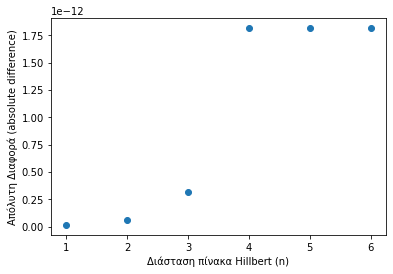

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def Absdiff(n,e):
    H = makeHillbert(n)
    L, U = LUmine(H)
    
    #Solve for b
    b = np.ones((n,1))
    y = np.matrix(n)
    x = np.matrix(n)
    y= b.T*L.I;
    x= y*U.I;
    
    #Solve for bnew
    b[0,0]=1+e
    bnew = b
    xnew = np.matrix(n)
    y= bnew.T*L.I;
    xnew= y*U.I;
    
    diff = np.max(np.abs(x-xnew))
    return diff

def plot(e):
    n=np.array([1,2,3,4,5,6])
    diff=np.empty(6)
    for i in range(1,7,1):
        diff[(i-1)]= Absdiff(i,e)
    plt.plot(n,diff, 'o')
    print("\nΔιάγραμμα Απόλυτης Διαφοράς (diff) - Διάσταση πίνακα Hillbert (n):")
    plt.xlabel("Διάσταση πίνακα Hillbert (n)")
    plt.ylabel("Απόλυτη Διαφορά (absolute difference)")
    plt.show()
    return

#Example for n=4 and difference e=10e-15
n=4
e=10e-15

print("Example for n=4 and e=10e-15:\n\nMaximum Absolute Difference:", Absdiff(n,e))
#Plotting the Diagram
plot(e)

**ε.** Χρησιμοποιώ και πάλι την συνάρτηση `makeHillbert(n)` για να φτιάξω τους πίνακες Hillbert που χρειάζομαι. Ωστόσο, ορίζω άλλες δύο συναρτήσεις, τις `SecNorm(n)` και `plotnorm()`.</br></br>
<u>Η συνάρτηση SecNorm(n)</u></br>
Η συνάρτηση αυτή δέχεται ως όρισμα μόνο το αριθμό των διαστάσεων n του πίνακα Hillbert. Καλεί συνολικά 4 συναρτήσεις, την ``makeHillbert(n)``, την `np.linalg.inv()`, την `np.linalg.norm` και την `np.identity()`. Έχουμε την δημιουργία του πίνακα Hillbert, τον υπολογισμό του αντιστρόφου του, τον υπολογισμό του γινομένου αυτών των δύο πινάκων, την δημιουργία ενός μοναδιαίου πίνακα $n\times{n}$ διαστάσεων και τέλος τον υπολογισμό της δεύτερης νόρμας (2-νόρμα) της διαφοράς του μοναδιαίου πίνακα και του γινομένου των πινάκων Hillbert. Η συνάρτηση επιστρέφει την τιμή της νόρμας.</br></br>
<u>Η συνάρτηση plotnorm()</u></br>
Η συνάρτηση αυτή κατασκευάζει το διάγραμμα της συνάρτησης των τιμών διάφορων διαστάσεων (n) του πίνακα Hillbert με την τιμή της 2-νόρμας. Η συνάρτηση αυτή καλεί μέσα της 8 φορές την συνάρτηση SecNorm(n), αποθηκεύει τις τιμές των n και της 2ης-νόρμας (2-norm) σε δύο διανύσματα οκτώ θέσεων και τα σχεδιάζει, σε διακριτές τιμές, στο Διάγραμμα 2-νόρμας της Διαφοράς - Διάσταση πίνακα Hillbert(n).

Από το διάγραμμα παρατηρούμε ότι με την αύξηση των διαστάσεων του πίνακα Hillbert (n) η 2η νόρμα της διαφοράς του μοναδιαίου πίνακα και του πίνακα $Η\cdot{H^{-1}}$ αυξάνεται κατά 10 περίπου μονάδες. Αυτό σημαίνει ότι με την αύξηση των διαστάσεων του πίνακα Hillbert, η διαδικασία αντιστροφής των πινάκων αυτών, αποκλίνει όλο και περισσότερο από την ταύτιση με τον μοναδιαίο πίνακα. Έτσι, κάποια στιγμή ένας μεγάλος πίνακας Hillbert υποθέτω ότι με την διαδικασία της αναστροφής, δεν θα μοιάζει καθόλου με τον μοναδιαίο πίνακα.

Second Norm for n=6:  2.9344687436075244e-10

Διάγραμμα 2-νόρμας της Διαφοράς - Διάσταση πίνακα Hillbert (n):


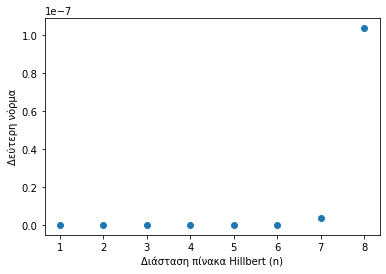

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def makeHillbert(n):
    H = np.matrix(np.zeros((n,n)))
    for i in range(0, n):
        for j in range(0, n):
            H[i,j] = 1/(i+j+1)  
    return H

def SecNorm(n):
    H = makeHillbert(n)
    HI = np.linalg.inv(H)
    I = np.identity(n)
    HHI = H*HI
    norm = np.linalg.norm((I-HHI), 2)
    return norm

def plotnorm():
    n=np.array([1,2,3,4,5, 6, 7, 8])
    norm=np.empty(8)
    for i in range(1,9,1):
        norm[(i-1)]= SecNorm(i)
    plt.plot(n,norm, 'o')
    print("\nΔιάγραμμα 2-νόρμας της Διαφοράς - Διάσταση πίνακα Hillbert (n):")
    plt.xlabel("Διάσταση πίνακα Hillbert (n)")
    plt.ylabel("Δεύτερη νόρμα")
    plt.show()
    return

#Example for n=6
print("Second Norm for n=6: ", SecNorm(6))

#Plotting the Diagram
plotnorm()

---

### <u>Πρόβλημα προσέγγισης</u>

Στο τελευταίο μέρος της εργασίας, μας δίνεται η συνάρτηση:
$$ y = cos(4t)+ 0,1ε(t) $$
και μας ζητείται να κατασκευαστεί ένα πολυώνυμο 4ου βαθμού που θα προσεγγίζει βέλτιστα αυτή την συνάρτηση. </br>
Αρχικά, κατασκευάζω τα διανύσματα $t$ και $y$, τα οποία περιέχουν 50 τιμές. Το διάνυσμα $y$ εξαρτάται φυσικά, από το διάνυσμα $t$ και από τις τιμές του κανονικά κατανεμημένου λευκού θορύβου, οι οποίες παράγονται από την συνάρτηση `np.random.randn()`.
Εκτυπώνω τα διανύσματα $t$ και $y$ που δημιούργησα. Στο επόμενο βήμα φτιάχνω το πολυώνυμο που προσεγγίζει βέλτιστα την συνάρτηση $y(t)$, αυτό γίνεται με την βοήθεια της συνάρτησης του πακέτου scipy, `optimize.curve_fit()`. Με αυτόν τον τρόπο βρίσκω, σύμφωνα με την μέθοδο των ελάχιστων τετραγώνων τις βέλτιστες τιμές των σταθερών όρων a, b, c, d και e του πολυωνύμου. Χρησιμοποιώ και την συνάρτηση `poly(t,a,b,c,d,e)` την οποία έφτιαξα για να την καλέσω μέσα στην συνάρτηση της scipy.</br>
Επιπλέον, βρίσκω το άθροισμα των τετραγωνικών σφαλμάτων μεταξύ των τιμών του πολυωνύμου προσέγγισης και της συνάρτησης που μου δόθηκε. Χρησιμοποιώ τον τύπο:</br>
$$ error_{i} = (y_{i}-f(x_{i}))^2 $$
και για το άθροισμα των τετραγωνικών σφαλμάτων, τον τύπο:
$$\sum_{i=1}^{n} (y_{i}-f(x_{i}))^2 $$
Έτσι, δημιούργησα την συνάρτηση `sumoferror(fx,y)` την οποία χρησιμοποίησα για να υπολογίσω το άθροισμα των τετραγωνικών σφαλμάτων και να το εκτυπώσω στην οθόνη.</br>
Ύστερα, απεικόνισα σε ένα διάγραμμα τις τιμές της συνάρτησης $y(t)$ που θα πάρω κάθε χρονική στιγμή $t$ από τα 0 εώς το 1 και την καμπύλη βέλτιστης προσέγγισης, δηλαδή την συνάρτηση του πολυωνύμου. Παρατηρώ ότι η καμπύλη βέλτιστης προσέγγισης προσεγγίζει αρκετά καλά τις τιμές που παίρνει η συνάρτηση $y(t)$ που μας δόθηκε.</br></br>

Τέλος, μου μένει η παραγοντοποίηση των συστημάτων με την μέθοδο παραγοντοποίησης LU και QR. Αρχικά, δημιουργώ τον πίνακα Α τον οποίο μαζί με το διάνυσμα $y$ θα λύσω την εξίσωση:
$$ A\cdot{x} = b $$
Ο πίνακας $Α$ αποτελείται από τα τις σταθερές του χρόνου $t$ μπροστά από τους αγνώστους $a, b, c, d, e$ και είναι $50\times{5}$. Ο πίνακας $x$ αποτελείται από τους 5 αγνώστους $a,b,c,d,e$ και έχει διαστάσεις $5\times{1}$ και ο πίνακας $b$ αποτελείται από το διάνυσμα $y$ το οποίο δημιουργήθηκε πριν.</br> Έχουμε λοιπόν:</br>
$$(\Sigma):
\begin{cases} a\cdot{{t_1}^4} + b\cdot{{t_1}^3} + c\cdot{{t_1}^2} + d\cdot{t_1} + e = y_1\\ a\cdot{{t_2}^4} + b\cdot{{t_2}^3} + c\cdot{{t_2}^2} + d\cdot{t_2} + e = y_2 \\ \vdots \\ a\cdot{{t_{50}}^4} + b\cdot{{t_{50}}^3} + c\cdot{{t_{50}}^2} + d\cdot{t_{50}} + e = y_{50} \end{cases}
$$</br>
Το σύστημα αυτό σε μορφή πινάκων θα γίνει:
$$ A\cdot{x} = b $$
</br>
$$\Rightarrow \begin{bmatrix}
{t_1}^4 & {t_1}^3 & {t_1}^2 & {t_1} & 1 \\
{t_2}^4 & {t_2}^3 & {t_2}^2 & {t_2} & 1 \\
\dots  & \dots  & \dots  & \dots & \dots  \\
{t_{50}}^4 & {t_{50}}^3 & {t_{50}}^2 & {t_{50}} & 1 
\end{bmatrix}
\cdot
\begin{bmatrix}
a \\ b \\ c \\ d \\ e 
\end{bmatrix}
=
\begin{bmatrix}
y_{1} \\ y_{2} \\ \dots \\ y_{50}
\end{bmatrix}
$$
Η λύση του συστήματος είναι ουσιαστικά ο πίνακας στήλη $x$, ο οποίος θα είναι:
$$
x = \begin{bmatrix}
a \\ b \\ c \\ d \\ e 
\end{bmatrix}
$$
Καθώς ο πίνακας $Α$ είναι διαστάσεων $50\times{5}$ θα τον κανονικοποίησω και θα τον κάνω τετραγωνικό κάνοντας την παρακάτω σειρά πράξεων:
$$
Α\cdot{A^T}\cdot{x} = A^T\cdot{b}
\\\Rightarrow B\cdot{x} = h
$$
Δημιουργώ, λοιπόν την συνάρτηση `Solve(Β,h)` στην οποία περνάω τους κανονικοποιημένους πίνακες Β και h. Με την βοήθεια των συναρτήσεων `QRmine(Α)` και `LUmine(Α)` βρίσκω το διάνυσμα $x_{LU}$, μέσω της παραγοντοποίησης LU και το διάνυσμα $x_{QR}$ μέσω της παραντοποίησης QR. Τα διανύσματα θα είναι ουσιαστικά δύο πίνακες στήλες $5\times{1}$, τα εκτυπώνω. Παρατηρώ ότι τα διανύσματα αυτά προσεγγίζουν τις μεταβλητές a,b,c,d,e που βρήκα μέσω της μεθόδου των ελάχιστων τετραγώνων.

Το διάνυσμα t θα είναι:
 [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]

Το διάνυσμα y θα είναι:
 [ 1.08436255  0.992371    0.83877301  0.84832793  1.0010825   0.98361976
  0.85091696  0.71349693  0.85632224  0.7543546   0.57135712  0.46975442
  0.54020092  0.61866003  0.4073024   0.22071145  0.39412758  0.18507491
  0.18687058 -0.06172181  0.06105672 -0.21821042 -0.33030468 -0.27697013
 -0.36880933 -0.49288244 -0.68696579 -0.47108227 -0.77867607 -0.64013517
 -0.8295003  -0.83009879 

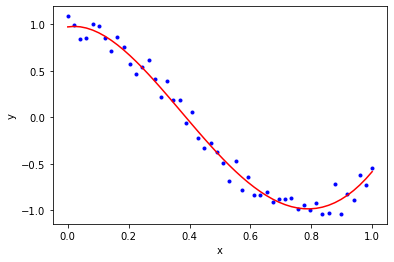


Η λύση xLU είναι:
 [[ -3.77330535]
 [ 15.25930729]
 [-13.61518623]
 [  0.63232028]
 [  0.96616073]]

Η λύση xQR είναι:
 [[ -3.77359323]
 [ 15.25987152]
 [-13.61554193]
 [  0.63239745]
 [  0.96615713]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def poly(t, a, b, c, d, e):
    y = a*t**4+b*t**3+c*t**2+d*t+e
    return y

def sumoferror(fx, y):
    error = np.matrix(50)
    error = (y - fx)**2
    for i in range(0,49):
        sumoferror =+ error[i]
    return sumoferror;

# 1. Δημιουργία t και y
t = np.linspace(0, 1, 50)
y = np.cos(4*t)+0.1*np.random.randn(t.shape[0])

print("Το διάνυσμα t θα είναι:\n", t)
print("\nΤο διάνυσμα y θα είναι:\n", y)

# 2. Φτι΄άχνω το πολυώνυμο
a, b, c, d, e = optimize.curve_fit(poly, xdata = t, ydata = y)[0]
print("\nΤο πολυώνυμο θα είναι:\ny= ", a, "x^4 +", b, "x^3 +", c, "x^2 +", d, "x +", e)

# 3. Άθροισμα τετραγωνικών σφαλμάτων
fx = poly(t, a, b, c, d, e)
print("\n\nΤο άθροισμα των τετραγωνικών σφαλμάτων είναι: ", sumoferror(fx,y));

# 4. Διάγραμματα
print("\nΤο διάγραμμα y-x θα είναι:\n")
plt.plot(t, y, 'b.')
plt.plot(t, a*t**4+b*t**3+c*t**2+d*t+e, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 5. Παραγοντοποίηση με χρήση των μεθόδων LU και QR

def LUmine(A):
    n = A.shape[0]   #Η διάσταση του πίνακα
    L = np.identity(n)  #Δημιουργία μοναδιαίου μέρους του L
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = A[i,j] / A[j,j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j, j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i,j] = mult
            U[i,j] = 0         
    return L, U

def QRmine(A):
    n = A.shape[0]
    Q = np.zeros( (n,n) )
    Q = np.asmatrix(Q)
    
    for j in range(0, n):
        q = A[:,j]
        for i in range(0, n):
            length_of_leg = np.sum(A[:,j].T * Q[:,i])
            q = q - length_of_leg * Q[:,i]
        Q[:,j] = q/np.linalg.norm(q)
    R = Q[:,:].T * A[:,:]
    R = np.asmatrix(R)
    return Q, R

def Solve(B,h):
    
    # QR decomposition
    Q, R = QRmine(B) 
    yQR = Q.I*h
    xQR = R.I*yQR
    
    # LU decomposition
    L, U = LUmine(B)
    L = np.asmatrix(L)
    U = np.asmatrix(U)
    yLU = L.I*h
    xLU = U.I*yLU

    return xLU, xQR

# Δημιουργία πίνακα Α
A = np.array(np.zeros((50,5)))
for i in range(0,49):
    for t in range(0,49):
        t1 = t/50
        A[t][:] = [t1**4, t1**3, t1**2, t1, 1]
A = np.asmatrix(A)

# Κανονικοποίηση πίνακα
B = A.T*A
y = y.reshape(50,1)
h = A.T * y

xLU, xQR = Solve(B, h)

print("\nΗ λύση xLU είναι:\n", xLU)
print("\nΗ λύση xQR είναι:\n", xQR)

----

### <u>Πηγές - Βιβλιογραφία</u>

Χρησιμοποίηθηκαν οι εξής πηγές για να εμπνευστώ και να συνθέσω τον παραπάνω κώδικα:

<li><a>https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html</a> - Κυρίως Chapter 16</li>
<li><a>https://numpy.org/doc/stable/reference/generated/numpy.matrix.html</a></li>
<li><a>https://numpy.org/doc/stable/user/basics.creation.html</a></li>
<li><a>https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize</a></li>
<li><a>https://www.math.ucla.edu/~yanovsky/Teaching/Math151B/handouts/GramSchmidt.pdf</a></li>
<li><a>https://tex.stackexchange.com/questions/393979/matrices-representation-of-linear-equation-ax-b</a></li>
<li>Εισαγωγή στην Αριθμητική Ανάλυση - 2η έκδοση- Πιτσούλης Λ. - Εκδόσεις Τζιόλα</li>
